# **Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Loading the Dataset**

In [2]:
df = pd.read_csv(r'/kaggle/input/smartphone-specifications-and-prices-in-india/smartphones - smartphones.csv')
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


# **Checking the Null Values**

In [3]:
df.isnull().sum()

model          0
price          0
rating       141
sim            0
processor      0
ram            0
battery        0
display        0
camera         1
card           7
os            17
dtype: int64

> *****If we look on the basis of mobile card and os plays a major role in mobile specification. So dropping these two null columns first makes us to proceed more easier*****

# **Dropping the NULL Values**

In [4]:
df.dropna(subset = ['os'], inplace=True)
df.dropna(subset = ['card'], inplace = True)
df.dropna(subset = ['camera'], inplace = True)
df.dropna(subset = ['rating'], inplace = True)
df.isnull().sum()

model        0
price        0
rating       0
sim          0
processor    0
ram          0
battery      0
display      0
camera       0
card         0
os           0
dtype: int64

# **Count of Mobile OS Model**

Text(0, 0.5, 'Count of Mobile OS Model')

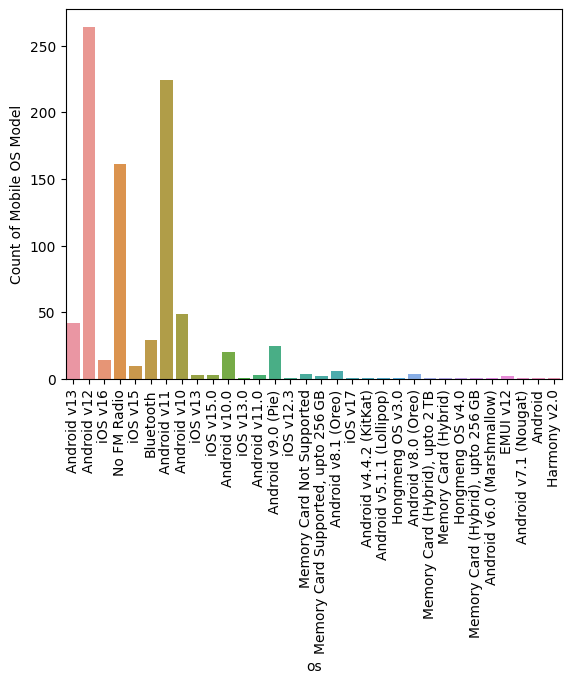

In [5]:
plt.xticks(rotation=90, fontsize=10)
sns.countplot(x= df['os'], data=df)
plt.ylabel('Count of Mobile OS Model')

> ***Since in display column multiple features are associated, splitting it using comma and creating new columns will help us to generate new insights that will be more easy to categorize and visualize***

# **Splitting Columns to create New Dataset**

In [6]:
#create new dataframe
data = pd.DataFrame()
#splitting data inorder to categorize easily and appending it to the new dataframe
new_col = df['display'].apply(lambda x: x.split(','))
data['screen_length'] = new_col.apply(lambda x: x[0])
data['pixels'] = new_col.apply(lambda x: x[-1])
split_processor_col = df['processor'].apply(lambda x: x.split(','))
data['processor_name'] = split_processor_col.apply(lambda x: x[0])
processor = data['processor_name'].apply(lambda x: x.split(' '))
data['processor'] = processor.apply(lambda x: x[0])
data['core'] = split_processor_col.apply(lambda x: x[-1])
split_mobile_name = df['model'].apply(lambda x: x.split(' '))
data['mobile_model'] = split_mobile_name.apply(lambda x: x[0])
data['mobile_model'] = data['mobile_model'].replace({'poco': 'POCO'})
data['model_spec_name'] = split_mobile_name.apply(lambda x: ''.join(x[1:]))
data['price'] = df['price'].apply(lambda x: int(''.join(x[1:].split(','))))
data['os'] = df['os']
data['battery'] = df['battery']
data['card'] = df['card']
data['camera'] = df['camera']
data['sim'] = df['sim']
data['rating'] = df['rating']
ram = df['ram'].apply(lambda x: x.split(','))
data['ram'] = ram.apply(lambda x: x[0])
data['rom'] = ram.apply(lambda x: x[-1])
data

,screen_length,pixels,processor_name,processor,core,mobile_model,model_spec_name,price,os,battery,card,camera,sim,rating,ram,rom
0,6.7 inches,120 Hz Display with Punch Hole,Snapdragon 8 Gen2,Snapdragon,3.2 GHz Processor,OnePlus,115G,54999,Android v13,5000 mAh Battery with 100W Fast Charging,Memory Card Not Supported,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",89.0,12 GB RAM,256 GB inbuilt
1,6.59 inches,120 Hz Display with Punch Hole,Snapdragon 695,Snapdragon,2.2 GHz Processor,OnePlus,NordCE2Lite5G,19989,Android v12,5000 mAh Battery with 33W Fast Charging,"Memory Card (Hybrid), upto 1 TB",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",81.0,6 GB RAM,128 GB inbuilt
2,6.6 inches,90 Hz Display with Water Drop Notch,Exynos 1330,Exynos,2.4 GHz Processor,Samsung,GalaxyA145G,16499,Android v13,5000 mAh Battery with 15W Fast Charging,"Memory Card Supported, upto 1 TB",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",75.0,4 GB RAM,64 GB inbuilt
3,6.55 inches,120 Hz Display with Punch Hole,Snapdragon 695,Snapdragon,2.2 GHz Processor,Motorola,MotoG625G,14999,Android v12,5000 mAh Battery with Fast Charging,"Memory Card (Hybrid), upto 1 TB",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",81.0,6 GB RAM,128 GB inbuilt
4,6.7 inches,120 Hz Display with Punch Hole,Dimensity 1080,Dimensity,2.6 GHz Processor,Realme,10ProPlus,24999,Android v13,5000 mAh Battery with 67W Fast Charging,Memory Card Not Supported,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",82.0,6 GB RAM,128 GB inbuilt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,6.67 inches,120 Hz Display with Punch Hole,Snapdragon 8 Gen1,Snapdragon,3 GHz Processor,Motorola,MotoEdgeS30Pro,34990,No FM Radio,5000 mAh Battery with 68.2W Fast Charging,Android v12,64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",83.0,8 GB RAM,128 GB inbuilt
1016,6.5 inches,720 x 1600 px Display with Water Drop Notch,Snapdragon 480+,Snapdragon,2.2 GHz Processor,Honor,X85G,14990,Android v11,5000 mAh Battery with 22.5W Fast Charging,"Memory Card Supported, upto 1 TB",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",75.0,6 GB RAM,128 GB inbuilt
1017,6.6 inches,144 Hz Display with Punch Hole,Dimensity 8100,Dimensity,2.85 GHz Processor,POCO,X4GT5G(8GBRAM+256GB),28990,Android v12,5080 mAh Battery with 67W Fast Charging,Memory Card Not Supported,64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...",85.0,8 GB RAM,256 GB inbuilt
1018,6.8 inches,1080 x 2400 px Display with Punch Hole,Snapdragon 695,Snapdragon,2.2 GHz Processor,Motorola,MotoG915G,19990,Android v12,5000 mAh Battery with Fast Charging,"Memory Card Supported, upto 1 TB",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",80.0,6 GB RAM,128 GB inbuilt


# **Count of Mobile Brands**

Text(0, 0.5, 'Count of Mobile model')

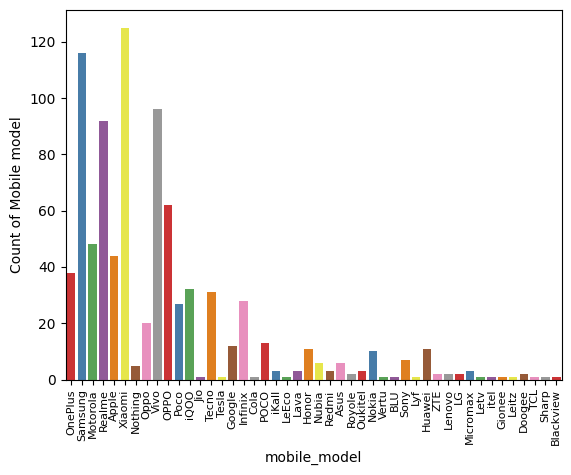

In [7]:
plt.xticks(rotation=90, fontsize=8)
sns.countplot(x= data['mobile_model'], data=data, palette = "Set1")
plt.ylabel('Count of Mobile model')

# **Average Price of Mobiles based on Model**

In [8]:
average_cost = data.groupby(['mobile_model'])['price'].mean().reset_index()
fig = px.bar(average_cost, x='mobile_model', y='price', labels={'Mobile_Model': 'mobile_model', 'Name': 'Average Price of Mobiles'},
             title='Average Price of Mobiles', color = 'mobile_model')
fig.show()

# **Highest Price Mobile Brand**

In [9]:
total_cost = data.groupby(['mobile_model'])['price'].sum().reset_index()
fig = px.bar(total_cost, x='mobile_model', y='price', labels={'Mobile_Model': 'mobile_model', 'Name': 'Total Price of Mobiles'},
             title='Total Price of Mobiles', color = 'mobile_model')
fig.show()

# **Categorizing based on Count of Mobile Processor**

Text(0.5, 0, 'Processor Name')

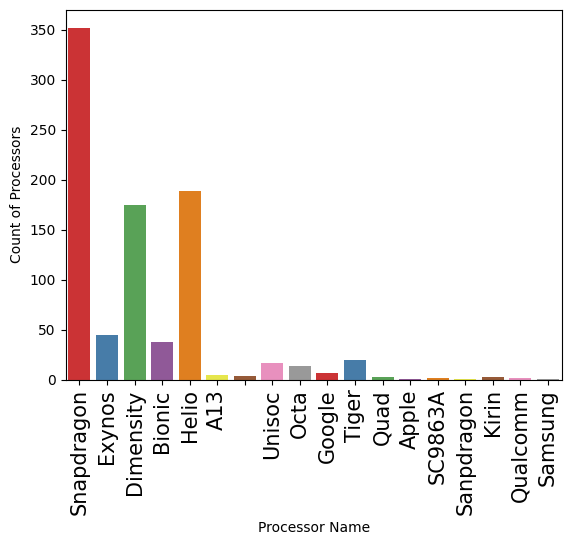

In [10]:
plt.xticks(rotation=90, fontsize=15)
sns.countplot(x= data['processor'], data=data, palette = "Set1")
plt.ylabel('Count of Processors')
plt.xlabel('Processor Name')

# **Average Rating of Mobile Brands**

In [11]:
average_rating = data.groupby(['mobile_model'])['rating'].mean().reset_index()
fig = px.bar(average_rating, x='mobile_model', y='rating', labels={'Mobile_Model': 'mobile_model', 'Name': 'Average Rating of Mobiles'},
             title='Average Rating of Mobiles', color = 'mobile_model')
fig.show()

# **Highest Rated Mobile**

In [12]:
highest_rating = data.groupby(['mobile_model'])['rating'].sum().reset_index()
fig = px.bar(highest_rating, x='mobile_model', y='rating', labels={'Mobile_Model': 'mobile_model', 'Name': 'Average Rating of Mobiles'},
             title='Average Rating of Mobiles', color = 'mobile_model')
fig.show()

# **Average Count of Mobile Sim Type**

In [13]:
average_count = data['sim'].value_counts(sort=False)
fig = px.bar(average_count, x='sim', y = average_count.index, labels={'Mobile_Model': 'mobile_model', 'Name': 'Average Count of Sim Type'},
             title='Average Count of Sim Type', color = 'sim')
fig.show()

# **Percentage of RAM**

In [14]:
percentage_ram = data['ram'].value_counts()
fig = px.pie(percentage_ram, values=percentage_ram.values, names=percentage_ram.index)
fig = go.Figure(data=[go.Pie(labels=percentage_ram.index, values=percentage_ram.values)])
fig.update_layout(legend={'font': {'size': 15}, })
fig.update_layout(
    width=900,
    height=500
)
fig.show()

# **Percentage of ROM**

In [15]:
percentage_rom = data['rom'].value_counts()
fig = px.pie(percentage_rom, values=percentage_rom.values, names=percentage_rom.index, color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# **Processor Count for Each Mobile Brand**

In [16]:
fig=px.histogram(data,x="mobile_model",color="processor",title="Count of Processor for every mobile brand",
                color_discrete_sequence=px.colors.qualitative.Vivid,
                width=1400, height=500)
fig.update_layout(title_font_size=20, yaxis_title= 'Count of Processor')
fig.show()

# **Count of RAM of Each Mobile Brand**

In [17]:
fig=px.histogram(data,x="mobile_model",color="ram",title="Count of RAM for every mobile brand",
                color_discrete_sequence=px.colors.qualitative.G10,
                width=1400, height=500)
fig.update_layout(title_font_size=20, yaxis_title= 'Count of RAM')
fig.show()

# **Count of ROM of Each Model**

In [18]:
fig=px.histogram(data,x="mobile_model",color="rom",title="Count of ROM for every mobile brand",
                color_discrete_sequence=px.colors.sequential.Plasma_r,
                width=1400, height=500)
fig.update_layout(title_font_size=20, yaxis_title= 'Count of ROM')
fig.show()

# **Count of Camera Fixtures for Each Model**

In [19]:
fig=px.histogram(data,x="mobile_model",color="camera",title="Count of Camera Fixtures for every mobile brand",
                color_discrete_sequence=px.colors.qualitative.Vivid,
                width=1400, height=800)
fig.update_layout(title_font_size=20, yaxis_title= 'Count of Camera Fixtures')
fig.show()

# **Count of Display for Each Brand**

In [20]:
fig=px.histogram(data,x="mobile_model",color="screen_length",title="Count of Display for every mobile brand",
                color_discrete_sequence=px.colors.qualitative.G10,
                width=1400, height=500, labels= {"mobile_model" : 'Mobile_model'})
fig.update_layout(title_font_size=20, yaxis_title= 'Count of Display')
fig.show()

# **Mobile Specifications**

In [21]:
fig = px.treemap(data, path=['mobile_model','screen_length', 'ram', 'rom'], color='mobile_model')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()